Here we will pip all our library for colab.

In [1]:
!pip install livelossplot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
pip install -q -U keras-tuner

     |████████████████████████████████| 135 kB 4.8 MB/s 
     |████████████████████████████████| 1.6 MB 40.1 MB/s 


### Import libraries :

In [3]:
# Librairie de base pour la visualisation et le nettoyage :
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import numpy as np
import pandas as pd

# Pour la synchronisation des images :
import matplotlib.image as mpimg
from skimage.transform import resize

# Librairie de Deep learning :
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

import keras
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Dropout, Flatten, Dense
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras import backend as K 

from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, CSVLogger

# Libraire de Metrics :
from sklearn.metrics import classification_report,confusion_matrix

# Pour ouvrir mes données :
import os, shutil, tarfile, requests
import math
import pathlib

# Pour sauvegarder ses données :
import pickle

# delete warnings :
import warnings
warnings.filterwarnings('ignore')

# aide :
# https://github.com/ayushdabra/stanford-dogs-dataset-classification/blob/master/inceptionV3-for-stanford-dogs-dataset.ipynb
# https://fr.slideshare.net/MichaelFUMERY1/computer-vision-classification-automatique-des-races-de-chien-partir-de-photos?from_action=save

In [4]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


## Visualization of folder :

In [6]:
annotation = ('/content/drive/My Drive/Colab Notebooks/Projet_6/Annotation/') # Pas d'interet dans l'état 
image = ('/content/drive/My Drive/Colab Notebooks/Projet_6/Images/')

In [7]:
# Count the number of breeds for dogs
breed_names = os.listdir(image)

print("Number of breeds in the dataset:", (len(breed_names)))

Number of breeds in the dataset: 120


For our analyse we will have to reduce the  number of breeds with the 10 top breeds.

In [8]:
# Count number of pictures for each breed
df_breeds = pd.DataFrame(index=breed_names,
                         data=[len(os.listdir(image + breed_name)) for breed_name in breed_names],
                         columns=["breeds_dogs"])

df_breeds = df_breeds.sort_values(by=['breeds_dogs'], ascending=False)[:10]
df_breeds.T # from object to array

n02085936-Maltese_dog  n02088094-Afghan_hound  \
breeds_dogs                    252                     239   

             n02092002-Scottish_deerhound  n02112018-Pomeranian  \
breeds_dogs                           232                   219   

             n02111889-Samoyed  n02107683-Bernese_mountain_dog  \
breeds_dogs                218                             218   

             n02090721-Irish_wolfhound  n02086240-Shih-Tzu  \
breeds_dogs                        218                 214   

             n02111500-Great_Pyrenees  n02111129-Leonberg  
breeds_dogs                       213                 210

In [9]:
breed_top_10 = df_breeds.T.columns.tolist()

In [10]:
import shutil

In [11]:
if not os.path.isdir("/content/drive/My Drive/Colab Notebooks/Projet_6/10_races/"):
 
  for breed in breed_names :

    source = "/content/drive/My Drive/Colab Notebooks/Projet_6/Images/" + breed
    dest = "/content/drive/My Drive/Colab Notebooks/Projet_6/10_races/" + breed.split('-')[-1]
    shutil.copytree(source, dest)

else : 
  print('The folder has already been created.')

The folder has already been created.


### Modify name of breeds :

#### For all breeds :

In [12]:
breed_top_10

['n02085936-Maltese_dog',
 'n02088094-Afghan_hound',
 'n02092002-Scottish_deerhound',
 'n02112018-Pomeranian',
 'n02111889-Samoyed',
 'n02107683-Bernese_mountain_dog',
 'n02090721-Irish_wolfhound',
 'n02086240-Shih-Tzu',
 'n02111500-Great_Pyrenees',
 'n02111129-Leonberg']

In [13]:
"""class_names = []
for breed in sorted(os.listdir(image)):
  splitted_breed = breed.split('-')
  if len(splitted_breed) > 2:
    class_names.append('-'.join(splitted_breed[1:]))
  else:
    class_names.append(splitted_breed[1])"""

"class_names = []\nfor breed in sorted(os.listdir(image)):\n  splitted_breed = breed.split('-')\n  if len(splitted_breed) > 2:\n    class_names.append('-'.join(splitted_breed[1:]))\n  else:\n    class_names.append(splitted_breed[1])"

#### Only for the top 10 breeds :

In [14]:
breed_top_10 = [breed.split('-')[-1] for breed in breed_top_10]

In [15]:
breed_names = breed_top_10

In [16]:
breed_names

['Maltese_dog',
 'Afghan_hound',
 'Scottish_deerhound',
 'Pomeranian',
 'Samoyed',
 'Bernese_mountain_dog',
 'Irish_wolfhound',
 'Tzu',
 'Great_Pyrenees',
 'Leonberg']

In [17]:
# breed_names = list(map(lambda x: x.replace('Tzu', 'Shih_Tsu'), breed_names)) # Replace the Tzu by Shih_Tzu because of the '-' split

In [18]:
image_top_10 = "/content/drive/My Drive/Colab Notebooks/Projet_6/10_races/"

## Visualisation d'une photo random :

### Color Set pict :

#### Fix a random Image :

In [19]:
# Choose random image
rand_idx = np.random.choice(range(len(breed_names)))
rand_img = plt.imread(image_top_10 + breed_names[rand_idx] + '/' + 
                      np.random.choice(os.listdir(image_top_10 + breed_names[rand_idx])))

In [20]:
fix_pict = rand_img # We will fix this picture to have a base to modify and to have a vizualisation of modification.

In [21]:
import cv2

In [22]:
def solarize(img, thr=128):

    img = np.where(img < thr, img, 255 - img)
    return img

In [23]:
# Transform image with differents color sets
breeds_grey = cv2.cvtColor(fix_pict,cv2.COLOR_RGB2GRAY)
breeds_YUV = cv2.cvtColor(fix_pict,cv2.COLOR_BGR2YUV)
breeds_solarization = solarize(fix_pict, thr=128)

#### Vizualisation of filter :

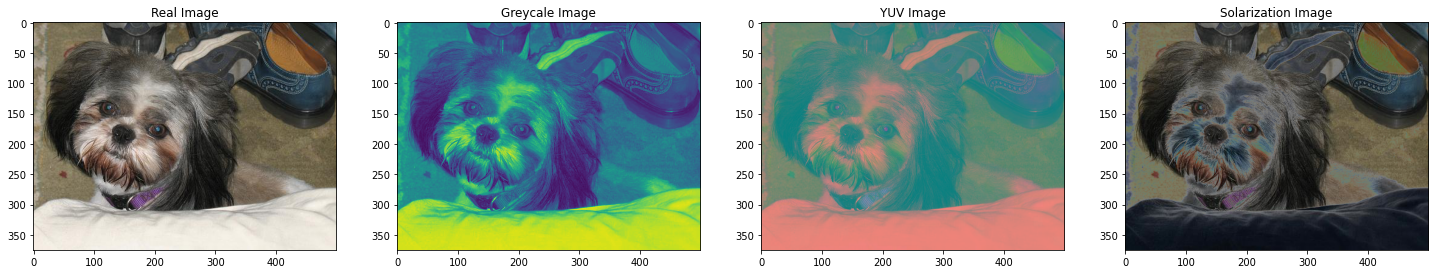

In [24]:
fig = plt.figure(figsize=(25,15))

plt.subplot(1, 4, 1) # Base
plt.imshow(rand_img)
plt.title("Real Image")

plt.subplot(1, 4, 2) # Greyscale
plt.imshow(breeds_grey)
plt.title("Greycale Image")

plt.subplot(1, 4, 3) # YUV
plt.imshow(breeds_YUV)
plt.title("YUV Image")

plt.subplot(1, 4, 4) # Solarization
plt.imshow(breeds_solarization)
plt.title("Solarization Image")

plt.show()

We have the difference between filter here :

# Preprocessing :

## Vizualisation of different preprocessing and the distribution :

cdf => cumsum distribution function 



In [25]:
# Create histogram
def preprocessing_pict (base_img, convert_img):


    hist, bins = np.histogram(
                    convert_img[1].flatten(),
                    224, [0,224])
    
    # Cumulative Distribution Function for the histogram
    cdf = hist.cumsum()
    cdf_normalized = cdf * float(hist.max()) /cdf.max()

    # Plot histogram
    fig = plt.figure(figsize=(25,6))
    
    # 1st vizualisation (RGB)
    plt.subplot(1, 3, 1)
    plt.imshow(base_img[1])
    plt.title("{} Image".format(base_img[0]))

    # 2nd vizualisation (Grey)
    plt.subplot(1, 3, 2)
    plt.imshow(convert_img[1])
    plt.title("{} Image".format(convert_img[0]))
    
    # 3rd vizualisation histogram
    plt.subplot(1, 3, 3)
    plt.plot(cdf_normalized, 
             color='black', alpha=.5,
             linestyle='--')
    
    plt.hist(convert_img[1].flatten(),256,[0,256])
    plt.xlim([0,256])
    plt.grid(True)
    plt.legend(('Cumsum Distribution Function','Distribution'))
    plt.title("Histogram of converted image")
    
    plt.show()

#### RGB vs Grey_Scale :

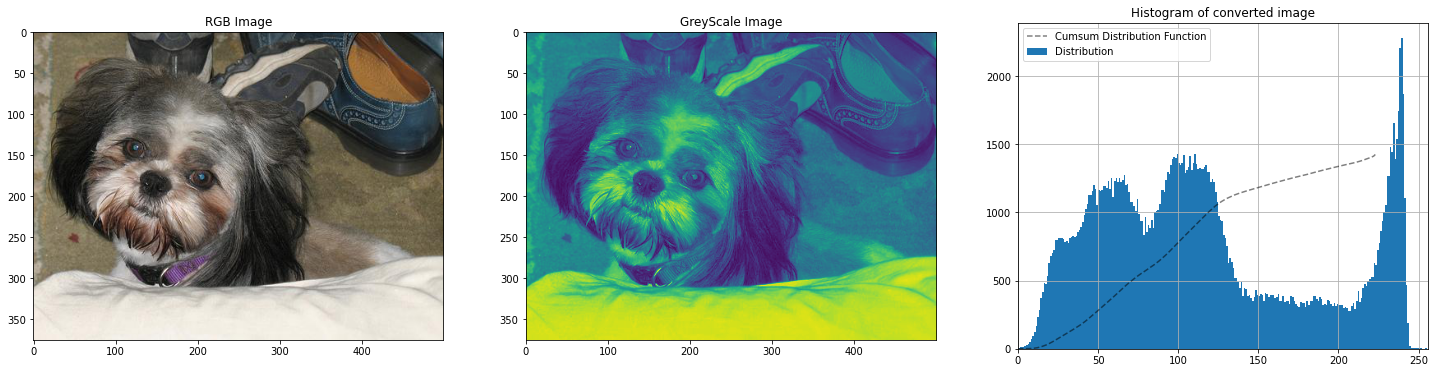

In [26]:
# Original image vs grey pict vs histogram
preprocessing_pict(["RGB", fix_pict], ["GreyScale", breeds_grey])

#### RGB vs YUV :

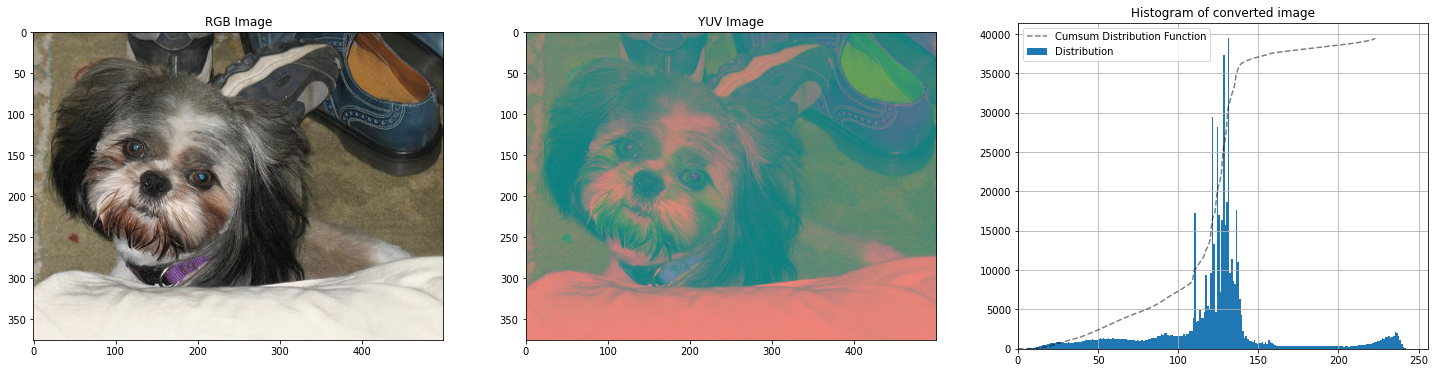

In [27]:
# Original image vs grey pict vs histogram
preprocessing_pict(["RGB", fix_pict], ["YUV", breeds_YUV])

With this YUV pict we will try to equalize it, so we will have a better pict for analysis.

#### RGB vs Solarization :

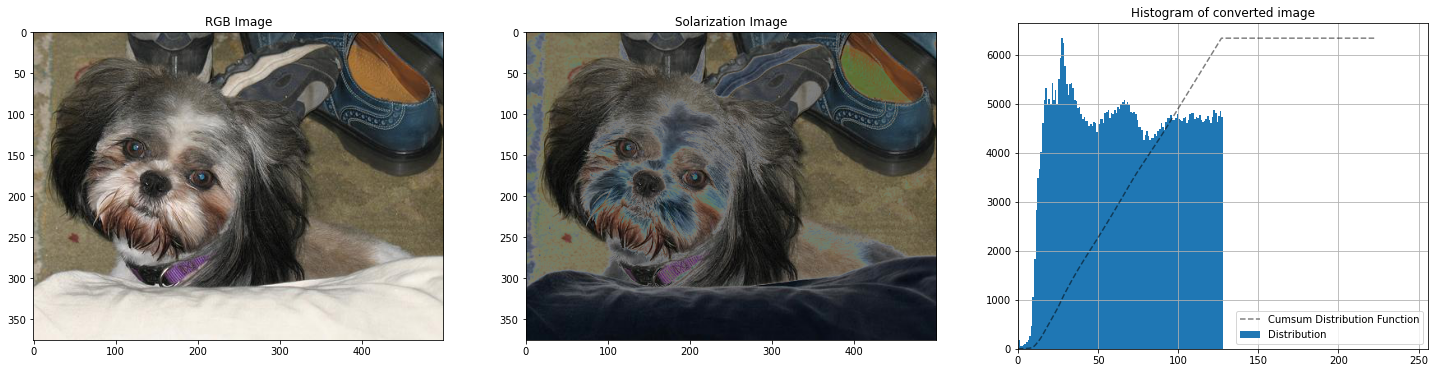

In [28]:
# Original image vs grey pict vs histogram
preprocessing_pict(["RGB", fix_pict], ["Solarization", breeds_solarization])

#### Equalization :

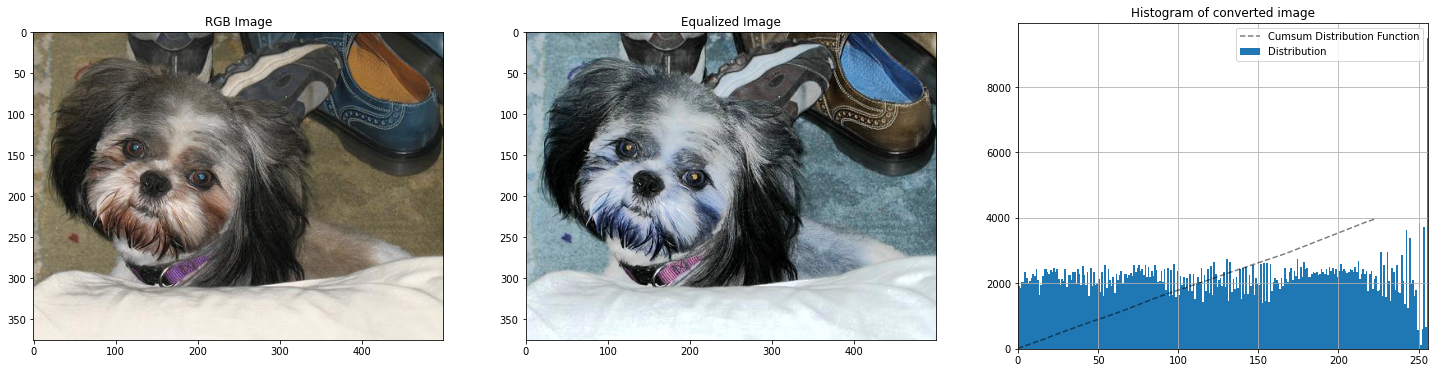

In [29]:
# Equalization
breeds_YUV[:,:,0] = cv2.equalizeHist(breeds_YUV[:,:,0])
breeds_equalizer = cv2.cvtColor(breeds_YUV, cv2.COLOR_YUV2RGB)
preprocessing_pict(["RGB", fix_pict], ["Equalized", breeds_equalizer])

As we can see, the pict is clear, a bit to light but clear.

#### Noising reduction :

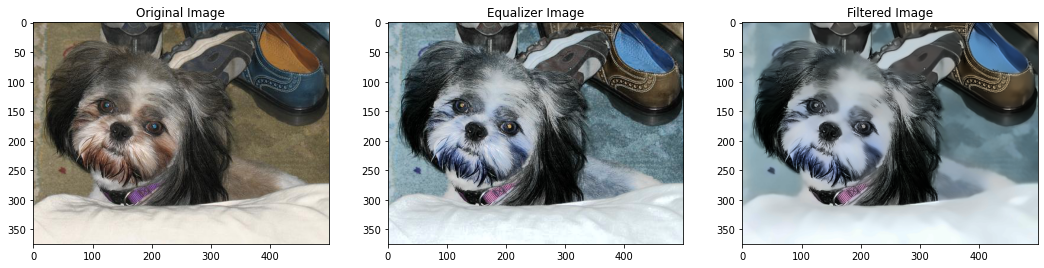

In [30]:
# Apply the filtered pict with original :
## Filtered pict :
breeds_noising = cv2.fastNlMeansDenoisingColored( # Reduce noise parameters
    src = breeds_equalizer,
    dst = None,
    h = 10,
    hColor = 10,
    templateWindowSize = 7,
    searchWindowSize = 21)

# Subplot for check both vizualisation between filtered and original :

fig = plt.figure(figsize=(18,12))
plt.subplot(1, 3, 1)
plt.imshow(fix_pict) # imshow vizualisation Original pict 
plt.title("Original Image")
plt.subplot(1, 3, 2) # 
plt.imshow(breeds_equalizer) # imshow vizualisation equalizer pict 
plt.title("Equalizer Image")
plt.subplot(1, 3, 3) # 
plt.imshow(breeds_noising) # imshow vizualisation noising reduction pict 
plt.title("Filtered Image")

plt.show()

Not a big difference between the Equalizer pict and the pict with noising reduction.

## Whitening : (Gave up)

source : https://www.pinecone.io/learn/bag-of-visual-words/

In [31]:
# skimage whitening
# Open CV whitening

# Extraction of features SIFT : (Gave up)

source : 
- https://vovkos.github.io/doxyrest-showcase/opencv/sphinxdoc/page_tutorial_py_sift_intro.html
- https://docs.opencv.org/3.4/d7/d60/classcv_1_1SIFT.html
- https://www.pinecone.io/learn/bag-of-visual-words/

# Training Data

source : https://www.tensorflow.org/tutorials/load_data/images

IMPORTER DIRECTEMENT LES CLASSES QUON VEUT => https://www.tensorflow.org/tutorials/load_data/images#using_tfdata_for_finer_control

In [32]:
num_classes = 10
img_height = 224
img_width = 224
channels = 3
batch_size = 16
image_size = (img_height, img_width)
images_shape = (img_height, img_width, channels)
input_shape  = (batch_size, img_height, img_width, channels)

In [33]:
normalization_layer = tf.keras.layers.Rescaling(1./255)

In [34]:
# Rajouter du scaling ici directement dans le train_ds et le val_ds
# # Greyscale pour le chargement du dataset paramétre mode

In [35]:
%%time
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    image_top_10,
    validation_split=0.2,
    subset="training",
    label_mode = 'int',
    labels = 'inferred',
    class_names = breed_names,
    seed = 1337, # random state
    image_size= image_size,
    batch_size=batch_size,
)

Found 2233 files belonging to 10 classes.
Using 1787 files for training.
CPU times: user 313 ms, sys: 246 ms, total: 559 ms
Wall time: 3.15 s


In [36]:
%%time
train_ds_grey = tf.keras.preprocessing.image_dataset_from_directory(
    image_top_10,
    validation_split=0.2,
    color_mode='grayscale',
    subset="training",
    label_mode = 'int',
    labels = 'inferred',
    class_names = breed_names,
    seed = 1337, # random state
    image_size= image_size,
    batch_size=batch_size,
)

Found 2233 files belonging to 10 classes.
Using 1787 files for training.
CPU times: user 246 ms, sys: 140 ms, total: 386 ms
Wall time: 719 ms


In [37]:
%%time
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    image_top_10,
    validation_split=0.2,
    subset="validation",
    label_mode = 'int',
    labels = 'inferred',
    class_names = breed_names,
    seed = 1337, # random state
    image_size=image_size,
    batch_size=batch_size,
)

Found 2233 files belonging to 10 classes.
Using 446 files for validation.
CPU times: user 249 ms, sys: 139 ms, total: 389 ms
Wall time: 738 ms


In [38]:
%%time
val_ds_grey = tf.keras.preprocessing.image_dataset_from_directory(
    image_top_10,
    validation_split=0.2,
    subset="validation",
    color_mode='grayscale',
    label_mode = 'int',
    labels = 'inferred',
    class_names = breed_names,
    seed = 1337, # random state
    image_size=image_size,
    batch_size=batch_size,
)

Found 2233 files belonging to 10 classes.
Using 446 files for validation.
CPU times: user 265 ms, sys: 149 ms, total: 414 ms
Wall time: 750 ms


#### Fixer le random :

In [39]:
tf.random.set_seed = 42

#### Data visualization :

Pour se donner une idée, on va commencer par visualiser 9 images.

CPU times: user 656 ms, sys: 173 ms, total: 829 ms
Wall time: 20.5 s


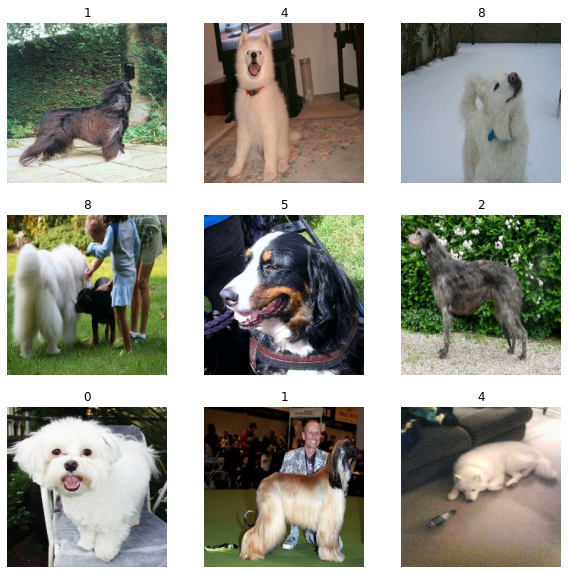

In [40]:
%%time
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

CPU times: user 906 ms, sys: 55.1 ms, total: 961 ms
Wall time: 1.73 s


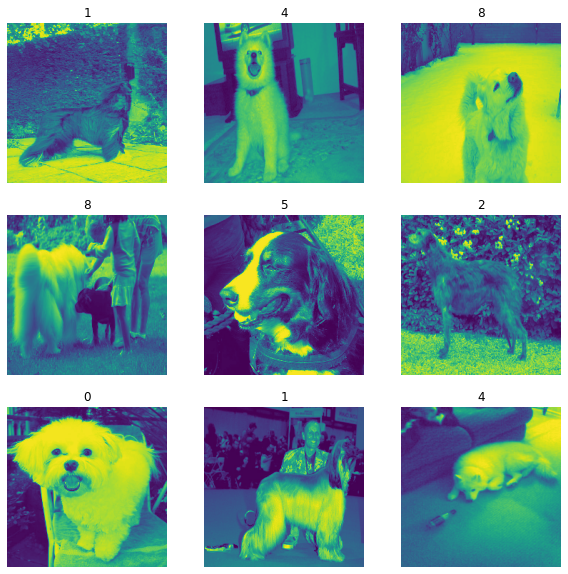

In [41]:
%%time
plt.figure(figsize=(10, 10))
for images, labels in train_ds_grey.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8").reshape(224,224))
        plt.title(int(labels[i]))
        plt.axis("off")

On va également regarder l'image batch et le labels_batch qui correspondent aux paramétres qu'on avait ajouté plus haut.

In [42]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(16, 224, 224, 3)
(16,)


### Resize and rescale :

In [43]:
IMG_SIZE = 224

rescale = tf.keras.Sequential([
    layers.Rescaling(1./255)])

#### Vizualisation of the results :

Min and max pixel values: 0.0 1.0


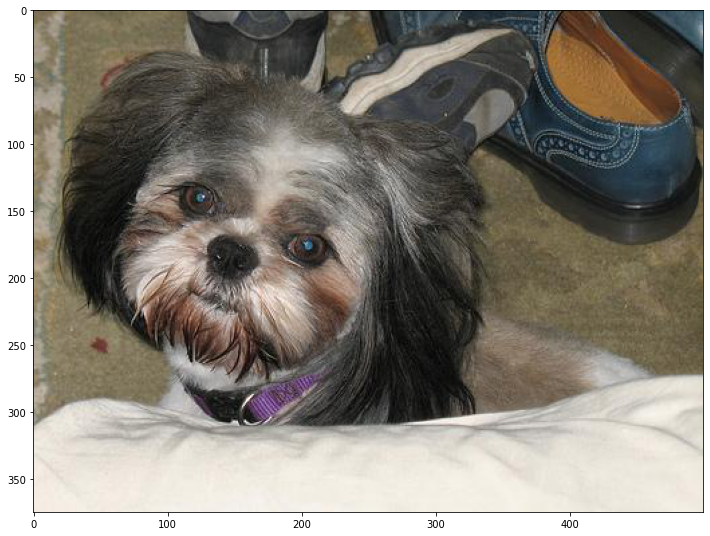

In [44]:
result = rescale(fix_pict)
plt.figure(figsize=(12,12))
_ = plt.imshow(result)
print("Min and max pixel values:", result.numpy().min(), result.numpy().max())

### Data increase :

In [45]:
data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal"),
  layers.RandomRotation(0.2),
])

#### Vizualisation of the results :

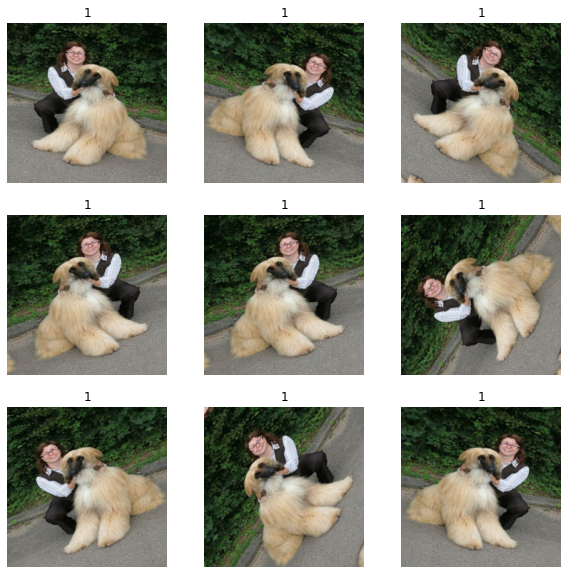

In [46]:
for images, labels in train_ds.take(1):
    plt.figure(figsize=(10, 10))
    first_image = images[0]
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        augmented_image = data_augmentation(
            tf.expand_dims(first_image, 0), training=True
        )
        plt.imshow(augmented_image[0].numpy().astype("int32"))
        plt.title(int(labels[0]))
        plt.axis("off")

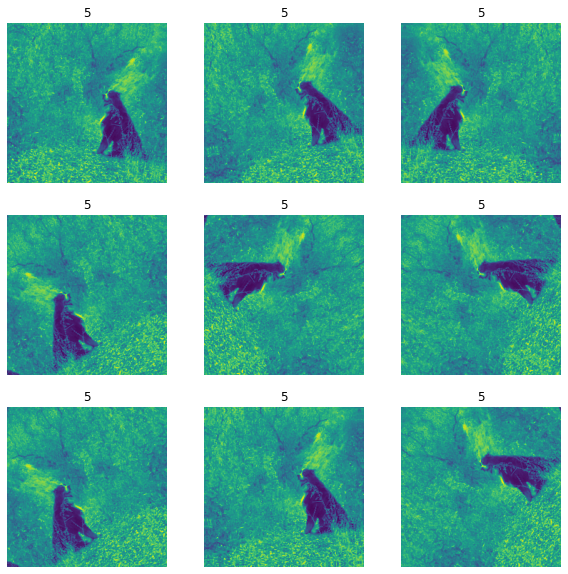

In [47]:
for images, labels in train_ds_grey.take(1):
    plt.figure(figsize=(10, 10))
    first_image = images[0]
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        augmented_image = data_augmentation(
            tf.expand_dims(first_image, 0), training=True
        )
        plt.imshow(augmented_image[0].numpy().astype("int32").reshape(224,224))
        plt.title(int(labels[0]))
        plt.axis("off")

## Configuration des données pour la performance :

Dataset.cache :


conserve les images en mémoire après leur chargement hors disque au cours de la première époque. Cela garantira que l'ensemble de données ne devienne pas un goulot d'étranglement lors de la formation de votre modèle. Si votre jeu de données est trop volumineux pour tenir en mémoire, vous pouvez également utiliser cette méthode pour créer un cache sur disque performant.


Dataset.prefetch :


chevauche le prétraitement des données et l'exécution du modèle pendant la formation.

source :   

https://www.tensorflow.org/tutorials/load_data/images

In [48]:
# buffer_size = représentant le nombre maximum d'éléments qui seront mis en mémoire tampon lors de la prélecture 

AUTOTUNE = tf.data.AUTOTUNE # pour régler dynamiquement la valeur du buffer_size

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Standardisation des données :

#### Création d'un layer :

Les valeurs des canaux RVB sont dans la plage [0, 255] . Ce n'est pas idéal pour un réseau neuronal.


Ici, on va normaliser les valeurs pour qu'elles soient dans la plage [0, 1] en utilisant tf.keras.layers.Rescaling :

## Normalisation des données :

#### Save normalized :

source : https://www.tensorflow.org/api_docs/python/tf/data/Dataset

In [49]:
"""%%time
if not os.path.isdir("/content/drive/My Drive/Colab Notebooks/Projet_6/dataset_normalized"):
  
  normalized_ds = train_ds.map(lambda x, y: (rescale(x), y))

  image_batch, labels_batch = next(iter(normalized_ds))

  first_image = image_batch[0]

  # Notice the pixel values are now in `[0,1]`.

  print(np.min(first_image), np.max(first_image))

  normalized_ds.save("/content/drive/My Drive/Colab Notebooks/Projet_6/dataset_normalized") # for save

else : 
  tf.data.Dataset.load("/content/drive/My Drive/Colab Notebooks/Projet_6/dataset_normalized") # for load"""

  # NON OPTIMAL

'%%time\nif not os.path.isdir("/content/drive/My Drive/Colab Notebooks/Projet_6/dataset_normalized"):\n  \n  normalized_ds = train_ds.map(lambda x, y: (rescale(x), y))\n\n  image_batch, labels_batch = next(iter(normalized_ds))\n\n  first_image = image_batch[0]\n\n  # Notice the pixel values are now in `[0,1]`.\n\n  print(np.min(first_image), np.max(first_image))\n\n  normalized_ds.save("/content/drive/My Drive/Colab Notebooks/Projet_6/dataset_normalized") # for save\n\nelse : \n  tf.data.Dataset.load("/content/drive/My Drive/Colab Notebooks/Projet_6/dataset_normalized") # for load'

# Create the model with 10 breeds :

Technique d 'extraction des features :

Keras tuner pour optimiser type GridSearchCV :

In [50]:
# à utiliser layers.Dropout(.2) un peu partout pour tester la val_loss pour la perte
# à rajouter la data augmentation 
# whitening dans le model ou méthode simple sk image
## SOURCE :
# https://inside-machinelearning.com/batch-normalization-la-meilleure-technique-pour-ameliorer-son-deep-learning/
# https://towardsdatascience.com/build-your-first-computer-vision-project-dog-breed-classification-a622d8fc691e

In [51]:
# tf.keras.layers.BatchNormalization()

## Model from Scratch :

### type VGG16 avec data augmentation :

In [52]:
scratch_vgg16 = Sequential([

  layers.Rescaling(1./255, input_shape=(img_height, img_width, channels)),

  # Data Augmentation :
  layers.RandomFlip("horizontal"),
  layers.RandomRotation(0.2),

  # 4 layers of convolution :
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(.5),

  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(.5),

  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(.5),

  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(.5),

  layers.GlobalAveragePooling2D(),

  layers.Flatten(), 

  layers.Dense(256, activation='relu'),

  # layers.BatchNormalization(), makes my score extremely bad

  layers.Dense(num_classes, activation = 'softmax'),
])

In [53]:
scratch_vgg16.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 random_flip_1 (RandomFlip)  (None, 224, 224, 3)       0         
                                                                 
 random_rotation_1 (RandomRo  (None, 224, 224, 3)      0         
 tation)                                                         
                                                                 
 conv2d (Conv2D)             (None, 224, 224, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 16)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 112, 112, 16)     

In [54]:
%%time
scratch_vgg16.compile(optimizer='Adadelta',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

CPU times: user 31.8 ms, sys: 0 ns, total: 31.8 ms
Wall time: 38.3 ms


In [55]:
%%time
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, CSVLogger

if not os.path.isdir("/content/drive/My Drive/Colab Notebooks/Projet_6/scratch_vgg16"):

  epochs= 20 # 20 Epochs

  checkpointer = ModelCheckpoint(filepath='/content/drive/My Drive/Colab Notebooks/Projet_6/scratch_vgg16', 
                                verbose=2, save_best_only=True)

  early_stopping = EarlyStopping(
        monitor='val_loss', # looking about this score
        patience = 5, # Equivalent epochs didnt move
        verbose=2,
        mode='auto',
        baseline=None,
        restore_best_weights=False,
        )
  
  csvlogger = CSVLogger(
    filename= "/content/drive/My Drive/Colab Notebooks/Projet_6/training_vgg16_DA_scratch.log",
    separator = ",",
    append = False
    )

  history = scratch_vgg16.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs,
    callbacks=[checkpointer, early_stopping, csvlogger]
    )

else :
  scratch_vgg16 = keras.models.load_model('/content/drive/My Drive/Colab Notebooks/Projet_6/scratch_vgg16')
  print('The Model has already been saved')

The Model has already been saved
CPU times: user 1.57 s, sys: 33.7 ms, total: 1.6 s
Wall time: 2.78 s


CPU times: user 1h 15min 18s, sys: 1min 11s, total: 1h 16min 30s
Wall time: 47min 31s

#### Vizualisation :

As we can see the score isnt good at all ..

CPU times: user 4.59 s, sys: 1.02 s, total: 5.61 s
Wall time: 5.81 s


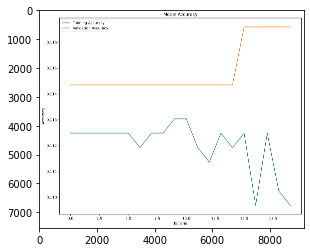

In [56]:
%%time

if not os.path.exists("/content/drive/My Drive/Colab Notebooks/Projet_6/VGG16_scratch_1.png"):

  plt.figure(figsize=(12,10))
  plt.title('Model Accuracy')
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.ylabel('Accuracy')
  plt.xlabel('Epochs')
  plt.legend(['Training Accuracy','Validation Accuracy'])
  plt.savefig('/content/drive/My Drive/Colab Notebooks/Projet_6/VGG16_scratch_1.png', transparent= False, bbox_inches= 'tight', dpi= 900)
  plt.show()

else :

  plt.imshow(plt.imread("/content/drive/My Drive/Colab Notebooks/Projet_6/VGG16_scratch_1.png"))

CPU times: user 4.55 s, sys: 428 ms, total: 4.98 s
Wall time: 5.15 s


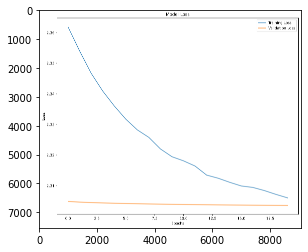

In [57]:
%%time

if not os.path.exists("/content/drive/My Drive/Colab Notebooks/Projet_6/VGG16_scratch_2.png"):

  plt.figure(figsize=(12,10))
  plt.title('Model Loss')
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.ylabel('Loss')
  plt.xlabel('Epochs')
  plt.legend(['Training Loss','Validation Loss'])
  plt.savefig('/content/drive/My Drive/Colab Notebooks/Projet_6/VGG16_scratch_2.png', transparent= False, bbox_inches= 'tight', dpi= 900)
  plt.show()

else :

  plt.imshow(plt.imread("/content/drive/My Drive/Colab Notebooks/Projet_6/VGG16_scratch_2.png"))

### Type AlexNet :

<img src= 'https://cdn.analyticsvidhya.com/wp-content/uploads/2021/03/Screenshot-from-2021-03-19-16-01-03.png' width=800/>

In [58]:
# source :
## https://numpy.org/doc/stable/reference/generated/numpy.ndarray.strides.html
## https://www.analyticsvidhya.com/blog/2021/03/introduction-to-the-architecture-of-alexnet/

### ARCHITECTURE BASED ON ALEXNET :
#### 5 block of convolutions / Batch normalization on each block.

scratch_AlexNet = keras.models.Sequential([

# Neural 1 :
    keras.layers.Conv2D(
        filters=128, 
        kernel_size=(11,11), 
        strides=(4,4), 
        activation='relu', 
        input_shape=images_shape
    ),

    keras.layers.BatchNormalization(), 
    keras.layers.MaxPool2D(pool_size=(2,2)),

# Neural 2 :
    keras.layers.Conv2D(
        filters=256, 
        kernel_size=(5,5), 
        strides=(1,1), 
        activation='relu', 
        padding="same"
    ),

    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3)),

# Neural 3 :
    keras.layers.Conv2D(
        filters=256, 
        kernel_size=(3,3), 
        strides=(1,1), 
        activation='relu', 
        padding="same"
    ),

    keras.layers.BatchNormalization(),

# Neural 4 :
    keras.layers.Conv2D(
        filters=256, 
        kernel_size=(1,1), 
        strides=(1,1), 
        activation='relu', 
        padding="same"
    ),
    keras.layers.BatchNormalization(),

# Neural 5 :
    keras.layers.Conv2D(
        filters=256, 
        kernel_size=(1,1), 
        strides=(1,1), 
        activation='relu', 
        padding="same"
    ),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(2,2)),


    keras.layers.Flatten(),


    keras.layers.Dense(1024,activation='relu'),
    keras.layers.Dropout(0.5),

    keras.layers.Dense(1024,activation='relu'),
    keras.layers.Dropout(0.5),


    keras.layers.Dense(num_classes,activation='softmax')])

In [59]:
scratch_AlexNet.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 54, 54, 128)       46592     
                                                                 
 batch_normalization (BatchN  (None, 54, 54, 128)      512       
 ormalization)                                                   
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 27, 27, 128)      0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 27, 27, 256)       819456    
                                                                 
 batch_normalization_1 (Batc  (None, 27, 27, 256)      1024      
 hNormalization)                                                 
                                                      

In [60]:
scratch_AlexNet.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['sparse_categorical_accuracy']
)

Normally we put 20 epochs but the score was upgraded at 20 so we decided to upgrade to 30.

In [61]:
%%time
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

if not os.path.isdir("/content/drive/My Drive/Colab Notebooks/Projet_6/scratch_AlexNet"):

  epochs= 20 # 20 Epochs

  checkpointer = ModelCheckpoint(filepath='/content/drive/My Drive/Colab Notebooks/Projet_6/scratch_AlexNet', 
                                verbose=2, save_best_only=True)

  early_stopping = EarlyStopping(
        monitor='val_loss', # looking about this score
        patience = 5, # Equivalent epochs didnt move
        verbose=2,
        mode='auto',
        baseline=None,
        restore_best_weights=False,
        )
  
  csvlogger = CSVLogger(
  filename= "/content/drive/My Drive/Colab Notebooks/Projet_6/scratch_AlexNet.log",
  separator = ",",
  append = False)

  history = scratch_AlexNet.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs,
    callbacks=[checkpointer, early_stopping, csvlogger]
    )

else :
  scratch_AlexNet = keras.models.load_model('/content/drive/My Drive/Colab Notebooks/Projet_6/scratch_AlexNet')
  print('The Model has already been saved')

The Model has already been saved
CPU times: user 1.56 s, sys: 122 ms, total: 1.68 s
Wall time: 3.2 s


Loss

	training         	 (min:    0.821, max:    3.920, cur:    0.857)
	validation       	 (min:    1.856, max:    3.353, cur:    1.932)

sparse_categorical_accuracy

	training         	 (min:    0.165, max:    0.713, cur:    0.713)
	validation       	 (min:    0.175, max:    0.386, cur:    0.368)
  
112/112 [==============================] - 138s 1s/step - loss: 0.8567 - sparse_categorical_accuracy: 0.7135 - val_loss: 1.9321 - val_sparse_categorical_accuracy: 0.3677

CPU times: user 1h 28min 1s, sys: 41.9 s, total: 1h 28min 43s

Wall time: 47min 58s

After 7 epoch the model start to overfit.. but we have still good accuracy between 0.35 et 0.40.

#### Vizualisation :

CPU times: user 4.55 s, sys: 444 ms, total: 5 s
Wall time: 5.3 s


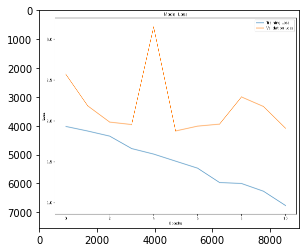

In [64]:
%%time

if not os.path.exists("/content/drive/My Drive/Colab Notebooks/Projet_6/scratch_AlexNet_1.png"):

  plt.figure(figsize=(12,10))
  plt.subplot()
  plt.title('Model Accuracy')
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.ylabel('Accuracy')
  plt.xlabel('Epochs')
  plt.legend(['Training Accuracy','Validation Accuracy'])
  plt.savefig('/content/drive/My Drive/Colab Notebooks/Projet_6/scratch_AlexNet_1.png', transparent= False, bbox_inches= 'tight', dpi= 900)
  plt.show()

else :

  plt.imshow(plt.imread("/content/drive/My Drive/Colab Notebooks/Projet_6/scratch_AlexNet_1.png"))

CPU times: user 4.92 s, sys: 528 ms, total: 5.45 s
Wall time: 6.28 s


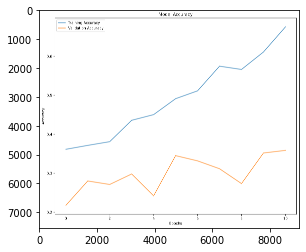

In [63]:
%%time

if not os.path.exists("/content/drive/My Drive/Colab Notebooks/Projet_6/scratch_AlexNet_2.png"):

  plt.figure(figsize=(12,10))
  plt.subplot()
  plt.title('Model Loss')
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.ylabel('Loss')
  plt.xlabel('Epochs')
  plt.legend(['Training Loss','Validation Loss'])
  plt.savefig('/content/drive/My Drive/Colab Notebooks/Projet_6/scratch_AlexNet_2.png', transparent= False, bbox_inches= 'tight', dpi= 900)
  plt.show()

else :

  plt.imshow(plt.imread("/content/drive/My Drive/Colab Notebooks/Projet_6/scratch_AlexNet_2.png"))

### AlexNet with greyscale :

In [65]:
# source :
## https://numpy.org/doc/stable/reference/generated/numpy.ndarray.strides.html
## https://www.analyticsvidhya.com/blog/2021/03/introduction-to-the-architecture-of-alexnet/

### ARCHITECTURE BASED ON ALEXNET :
#### 5 block of convolutions / Batch normalization on each block.
images_shape_grey = (224,224,1)
scratch_AlexNet_grey = keras.models.Sequential([

# Neural 1 :
    keras.layers.Conv2D(
        filters=128, 
        kernel_size=(11,11), 
        strides=(4,4), 
        activation='relu', 
        input_shape=images_shape_grey
    ),

    keras.layers.BatchNormalization(), 
    keras.layers.MaxPool2D(pool_size=(2,2)),

# Neural 2 :
    keras.layers.Conv2D(
        filters=256, 
        kernel_size=(5,5), 
        strides=(1,1), 
        activation='relu', 
        padding="same"
    ),

    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3)),

# Neural 3 :
    keras.layers.Conv2D(
        filters=256, 
        kernel_size=(3,3), 
        strides=(1,1), 
        activation='relu', 
        padding="same"
    ),

    keras.layers.BatchNormalization(),

# Neural 4 :
    keras.layers.Conv2D(
        filters=256, 
        kernel_size=(1,1), 
        strides=(1,1), 
        activation='relu', 
        padding="same"
    ),
    keras.layers.BatchNormalization(),

# Neural 5 :
    keras.layers.Conv2D(
        filters=256, 
        kernel_size=(1,1), 
        strides=(1,1), 
        activation='relu', 
        padding="same"
    ),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(2,2)),


    keras.layers.Flatten(),


    keras.layers.Dense(1024,activation='relu'),
    keras.layers.Dropout(0.5),

    keras.layers.Dense(1024,activation='relu'),
    keras.layers.Dropout(0.5),


    keras.layers.Dense(num_classes,activation='softmax')])

In [66]:
scratch_AlexNet_grey.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 54, 54, 128)       15616     
                                                                 
 batch_normalization_5 (Batc  (None, 54, 54, 128)      512       
 hNormalization)                                                 
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 27, 27, 128)      0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 27, 27, 256)       819456    
                                                                 
 batch_normalization_6 (Batc  (None, 27, 27, 256)      1024      
 hNormalization)                                                 
                                                      

In [67]:
scratch_AlexNet_grey.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['sparse_categorical_accuracy']
)

In [68]:
%%time
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

if not os.path.isdir("/content/drive/My Drive/Colab Notebooks/Projet_6/scratch_AlexNet_grey"):

  epochs= 20 # 20 Epochs

  checkpointer = ModelCheckpoint(filepath='/content/drive/My Drive/Colab Notebooks/Projet_6/scratch_AlexNet_grey', 
                                verbose=2, save_best_only=True)

  early_stopping = EarlyStopping(
        monitor='val_loss', # looking about this score
        patience = 5, # Equivalent epochs didnt move
        verbose=2,
        mode='auto',
        baseline=None,
        restore_best_weights=False,
        )
  
  csvlogger = CSVLogger(
  filename= "/content/drive/My Drive/Colab Notebooks/Projet_6/scratch_AlexNet_grey.log",
  separator = ",",
  append = False)

  history = scratch_AlexNet_grey.fit(
    train_ds_grey,
    validation_data=val_ds_grey,
    epochs=epochs,
    callbacks=[checkpointer, early_stopping, csvlogger]
    )

else :
  scratch_AlexNet_grey = keras.models.load_model('/content/drive/My Drive/Colab Notebooks/Projet_6/scratch_AlexNet_grey')
  print('The Model has already been saved')

The Model has already been saved
CPU times: user 1.52 s, sys: 95.3 ms, total: 1.61 s
Wall time: 3.42 s


CPU times: user 1h 47min 24s, sys: 1min 3s, total: 1h 48min 27s
Wall time: 1h 29s

#### Vizualisation :

CPU times: user 5.06 s, sys: 532 ms, total: 5.59 s
Wall time: 6.28 s


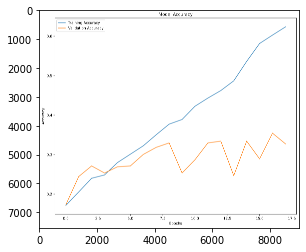

In [69]:
%%time

if not os.path.exists('/content/drive/My Drive/Colab Notebooks/Projet_6/scratch_AlexNet_grey_1.png'):

  plt.figure(figsize=(12,10))
  plt.subplot()
  plt.title('Model Accuracy')
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.ylabel('Accuracy')
  plt.xlabel('Epochs')
  plt.legend(['Training Accuracy','Validation Accuracy'])
  plt.savefig('/content/drive/My Drive/Colab Notebooks/Projet_6/scratch_AlexNet_grey_1.png', transparent= False, bbox_inches= 'tight', dpi= 900)
  plt.show()

else :

  plt.imshow(plt.imread('/content/drive/My Drive/Colab Notebooks/Projet_6/scratch_AlexNet_grey_1.png'))

CPU times: user 5.7 s, sys: 1.47 s, total: 7.17 s
Wall time: 13 s


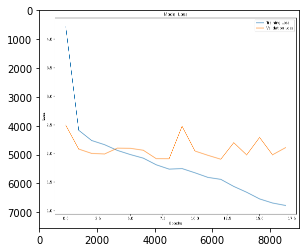

In [70]:
%%time

if not os.path.exists('/content/drive/My Drive/Colab Notebooks/Projet_6/scratch_AlexNet_grey_2.png'):

  plt.figure(figsize=(12,10))
  plt.subplot()
  plt.title('Model Loss')
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.ylabel('Loss')
  plt.xlabel('Epochs')
  plt.legend(['Training Loss','Validation Loss'])
  plt.savefig('/content/drive/My Drive/Colab Notebooks/Projet_6/scratch_AlexNet_grey_2.png', transparent= False, bbox_inches= 'tight', dpi= 900)
  plt.show()

else :

  plt.imshow(plt.imread('/content/drive/My Drive/Colab Notebooks/Projet_6/scratch_AlexNet_grey_2.png'))

# Transfert Learning with 10 breeds :

source : https://towardsdatascience.com/step-by-step-vgg16-implementation-in-keras-for-beginners-a833c686ae6c

In [71]:
# softmax pour activation multi classe

In [72]:
import keras_tuner as kt

### VGG 16 :

In [73]:
vgg16 = tf.keras.applications.VGG16(include_top = False, weights = 'imagenet', input_shape=(224,224,3))

58889256/58889256 [==============================] - 1s 0us/step


In [74]:
K.clear_session()
vgg16_model = keras.applications.VGG16(include_top=False,
                  input_shape=(224,224,3),
                  weights = 'imagenet', # Load weights pre-trained on ImageNet.
                  pooling = 'avg'
                  ) 

for layer in vgg16_model.layers :
  layer.trainable = False


flatten = vgg16_model.output
flatten = Dense(1024, activation = 'relu')(flatten)
flatten = Dropout(0.5)(flatten)
predictions = Dense(10, activation = 'softmax')(flatten)
vgg16_model = tf.keras.models.Model(inputs=vgg16_model.input, outputs = predictions)

In [75]:
vgg16_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

source : https://www.tensorflow.org/tutorials/keras/keras_tuner

Tester d'autres estimateurs autres que Adam

In [76]:
%%time
vgg16_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

CPU times: user 24.3 ms, sys: 0 ns, total: 24.3 ms
Wall time: 24.4 ms


In [77]:
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

In [78]:
%%time

if not os.path.isdir("/content/drive/My Drive/Colab Notebooks/Projet_6/vgg16"):

  epochs= 20 # 20 Epochs

  checkpointer = ModelCheckpoint(filepath='/content/drive/My Drive/Colab Notebooks/Projet_6/vgg16', 
                                verbose=2, save_best_only=True)

  early_stopping = EarlyStopping(
      monitor='val_loss', # looking about this score
      patience = 5, # Equivalent epochs didnt move
      verbose=2,
      mode='auto',
      baseline=None,
      restore_best_weights=False,
      )
  
  csvlogger = CSVLogger(
  filename= "training_vgg16.log",
  separator = ",",
  append = False)

  history = vgg16_model.fit(
      train_ds,
      validation_data=val_ds,
      epochs=epochs,
      callbacks=[checkpointer, early_stopping, csvlogger]
      )


else :
  efficient_model = keras.models.load_model('/content/drive/My Drive/Colab Notebooks/Projet_6/vgg16')
  print('The Model has already been saved')

The Model has already been saved
CPU times: user 1.58 s, sys: 107 ms, total: 1.69 s
Wall time: 3.99 s


#### Vizualisation :

CPU times: user 4.88 s, sys: 347 ms, total: 5.23 s
Wall time: 5.73 s


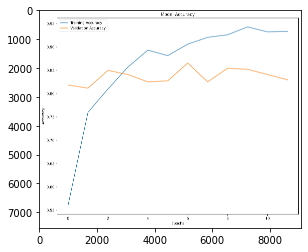

In [79]:
%%time

if not os.path.exists("/content/drive/My Drive/Colab Notebooks/Projet_6/vgg16_1.png"):

  plt.figure(figsize=(12,10))
  plt.subplot()
  plt.title('Model Accuracy')
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.ylabel('Accuracy')
  plt.xlabel('Epochs')
  plt.legend(['Training Accuracy','Validation Accuracy'])
  plt.savefig('/content/drive/My Drive/Colab Notebooks/Projet_6/vgg16_1.png', transparent= False, bbox_inches= 'tight', dpi= 900)
  plt.show()

else :

  plt.imshow(plt.imread("/content/drive/My Drive/Colab Notebooks/Projet_6/vgg16_1.png"))

CPU times: user 4.46 s, sys: 191 ms, total: 4.65 s
Wall time: 4.87 s


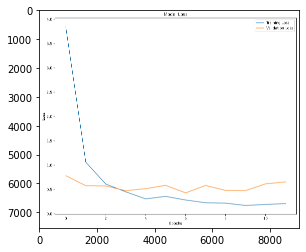

In [80]:
%%time

if not os.path.exists("/content/drive/My Drive/Colab Notebooks/Projet_6/vgg16_2.png"):

  plt.figure(figsize=(12,10))
  plt.title('Model Loss')
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.ylabel('Loss')
  plt.xlabel('Epochs')
  plt.legend(['Training Loss','Validation Loss'])
  plt.savefig('/content/drive/My Drive/Colab Notebooks/Projet_6/vgg16_2.png', transparent= False, bbox_inches= 'tight', dpi= 900)
  plt.show()

else :

  plt.imshow(plt.imread("/content/drive/My Drive/Colab Notebooks/Projet_6/vgg16_2.png"))

Source : https://www.tensorflow.org/tutorials/images/transfer_learning

### REST NET 50 :

source : https://datagen.tech/guides/computer-vision/resnet-50/

In [81]:
K.clear_session()
rest_net_50_model = keras.applications.ResNet50(include_top=False,
                  input_shape=(224,224,3),
                  weights = 'imagenet', # Load weights pre-trained on ImageNet.
                  pooling = 'avg'
                  ) 

for layer in rest_net_50_model.layers :
  layer.trainable = False


flatten = rest_net_50_model.output
flatten = Dense(1024, activation = 'relu')(flatten)
flatten = Dropout(0.5)(flatten)
predictions = Dense(10, activation = 'softmax')(flatten)
rest_net_50_model = tf.keras.models.Model(inputs=rest_net_50_model.input, outputs = predictions)

94765736/94765736 [==============================] - 0s 0us/step


In [82]:
rest_net_50_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [83]:
rest_net_50_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [84]:
%%time
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

if not os.path.isdir("/content/drive/My Drive/Colab Notebooks/Projet_6/rest_net_50"):

  epochs= 20 # 20 Epochs


  checkpointer = ModelCheckpoint(filepath='/content/drive/My Drive/Colab Notebooks/Projet_6/rest_net_50', 
                                verbose=2, save_best_only=True)

  early_stopping = EarlyStopping(
        monitor='val_loss', # looking about this score
        patience = 5, # Equivalent epochs didnt move
        verbose=2,
        mode='auto',
        baseline=None,
        restore_best_weights=False,
        )
  
  csvlogger = CSVLogger(
  filename= "/content/drive/My Drive/Colab Notebooks/Projet_6/training_restnet50.log",
  separator = ",",
  append = False)
    
  history = rest_net_50_model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs,
    callbacks=[checkpointer, early_stopping, csvlogger]
    )

else :
  rest_net_50_model = keras.models.load_model('/content/drive/My Drive/Colab Notebooks/Projet_6/rest_net_50')
  print('The Model has already been saved')

The Model has already been saved
CPU times: user 11.3 s, sys: 619 ms, total: 12 s
Wall time: 15.2 s


CPU times: user 1h 43min 26s, sys: 4min 25s, total: 1h 47min 51s
Wall time: 1h 3min 24s

#### Vizualisation

CPU times: user 1.84 s, sys: 144 ms, total: 1.98 s
Wall time: 2.19 s


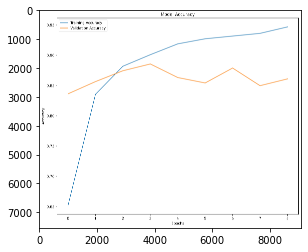

In [85]:
%%time

if not os.path.exists("/content/drive/My Drive/Colab Notebooks/Projet_6/rest_net_50_1.jpg"):

  plt.figure(figsize=(12,10))
  plt.subplot()
  plt.title('Model Accuracy')
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.ylabel('Accuracy')
  plt.xlabel('Epochs')
  plt.legend(['Training Accuracy','Validation Accuracy'])
  plt.savefig('/content/drive/My Drive/Colab Notebooks/Projet_6/rest_net_50_1.jpg', transparent= False, bbox_inches= 'tight', dpi= 900)
  plt.show()

else :

  plt.imshow(plt.imread("/content/drive/My Drive/Colab Notebooks/Projet_6/rest_net_50_1.jpg"))

CPU times: user 1.87 s, sys: 73.2 ms, total: 1.94 s
Wall time: 2.12 s


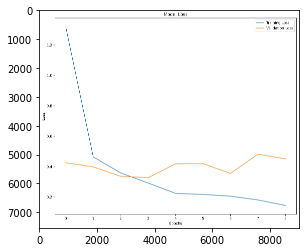

In [86]:
%%time

if not os.path.exists("/content/drive/My Drive/Colab Notebooks/Projet_6/rest_net_50_2.jpg"):

  plt.figure(figsize=(12,10))
  plt.title('Model Loss')
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.ylabel('Loss')
  plt.xlabel('Epochs')
  plt.legend(['Training Loss','Validation Loss'])
  plt.savefig("/content/drive/My Drive/Colab Notebooks/Projet_6/rest_net_50_2.jpg", transparent= False, bbox_inches= 'tight', dpi= 900)
  plt.show()

else :

  plt.imshow(plt.imread("/content/drive/My Drive/Colab Notebooks/Projet_6/rest_net_50_2.jpg"))

### EFFICIENT NET :

In [87]:
efficient_net = tf.keras.applications.EfficientNetB0(include_top = False, weights = 'imagenet', input_shape=(224,224,3))

16705208/16705208 [==============================] - 0s 0us/step


In [88]:
K.clear_session()
efficient_model = keras.applications.EfficientNetB0(include_top=False,
                  input_shape=(224,224,3),
                  weights = 'imagenet', # Load weights pre-trained on ImageNet.
                  pooling = 'avg'
                  ) 

for layer in efficient_model.layers :
  layer.trainable = False


flatten = efficient_model.output
flatten = Dense(1024, activation = 'relu')(flatten)
flatten = Dropout(0.5)(flatten)
predictions = Dense(10, activation = 'softmax')(flatten)
efficient_model = tf.keras.models.Model(inputs=efficient_model.input, outputs = predictions)

In [89]:
%%time
efficient_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

CPU times: user 11.9 ms, sys: 1.04 ms, total: 13 ms
Wall time: 15.1 ms


In [90]:
efficient_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 224, 224, 3)  0           ['input_1[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, 224, 224, 3)  7           ['rescaling[0][0]']              
                                                                                                  
 tf.math.truediv (TFOpLambda)   (None, 224, 224, 3)  0           ['normalization[0][0]']      

In [91]:
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

In [92]:
%%time

if not os.path.isdir("/content/drive/My Drive/Colab Notebooks/Projet_6/efficient_net_model"):

  epochs= 20 # 20 Epochs

  checkpointer = ModelCheckpoint(filepath='/content/drive/My Drive/Colab Notebooks/Projet_6/efficient_net_model', 
                                verbose=2, save_best_only=True)

  early_stopping = EarlyStopping(
        monitor='val_loss', # looking about this score
        patience = 5, # Equivalent epochs didnt move
        verbose=2,
        mode='auto',
        baseline=None,
        restore_best_weights=False,
        )

  csvlogger = CSVLogger(
  filename= "/content/drive/My Drive/Colab Notebooks/Projet_6/efficient_net_model.log",
  separator = ",",
  append = False)

  history = efficient_model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs,
    callbacks=[checkpointer, early_stopping, csvlogger]
    )

  efficient_model.save('/content/drive/My Drive/Colab Notebooks/Projet_6/efficient_net_model')

else :
  efficient_model = keras.models.load_model('/content/drive/My Drive/Colab Notebooks/Projet_6/efficient_net_model')
  print('The Model has already been saved')

The Model has already been saved
CPU times: user 18 s, sys: 609 ms, total: 18.6 s
Wall time: 22.5 s


#### Vizualisation :

CPU times: user 1.86 s, sys: 81.4 ms, total: 1.94 s
Wall time: 2.17 s


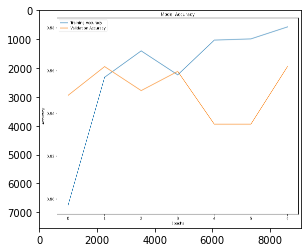

In [93]:
%%time

if not os.path.exists('/content/drive/My Drive/Colab Notebooks/Projet_6/efficient_net_model_1.jpg'):

  plt.figure(figsize=(12,10))
  plt.subplot()
  plt.title('Model Accuracy')
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.ylabel('Accuracy')
  plt.xlabel('Epochs')
  plt.legend(['Training Accuracy','Validation Accuracy'])
  plt.savefig('/content/drive/My Drive/Colab Notebooks/Projet_6/efficient_net_model_1.jpg', transparent= False, bbox_inches= 'tight', dpi= 900)
  plt.show()

else :

  plt.imshow(plt.imread('/content/drive/My Drive/Colab Notebooks/Projet_6/efficient_net_model_1.jpg'))

CPU times: user 1.82 s, sys: 79.8 ms, total: 1.9 s
Wall time: 2.59 s


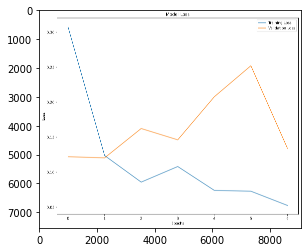

In [94]:
%%time

if not os.path.exists('/content/drive/My Drive/Colab Notebooks/Projet_6/efficient_net_model_2.jpg'):

  plt.figure(figsize=(12,10))
  plt.title('Model Loss')
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.ylabel('Loss')
  plt.xlabel('Epochs')
  plt.legend(['Training Loss','Validation Loss'])
  plt.savefig('/content/drive/My Drive/Colab Notebooks/Projet_6/efficient_net_model_2.jpg', transparent= False, bbox_inches= 'tight', dpi= 900)
  plt.show()

else :

  plt.imshow(plt.imread('/content/drive/My Drive/Colab Notebooks/Projet_6/efficient_net_model_2.jpg'))

### Xception :

In [95]:
from tensorflow.keras.applications.xception import Xception, preprocess_input

In [96]:
K.clear_session()
xception_model = keras.applications.Xception(include_top=False,
                  input_shape=(224,224,3),
                  weights = 'imagenet', # Load weights pre-trained on ImageNet.
                  pooling = 'avg'
                  ) 

for layer in xception_model.layers :
  layer.trainable = False


base_output = xception_model.output
base_output = Dense(128, activation = 'relu')(base_output)
base_output = Dropout(0.5)(base_output)

predictions = Dense(10, activation = 'softmax')(base_output)

xcept_model = tf.keras.models.Model(inputs=xception_model.input, outputs = predictions)

83683744/83683744 [==============================] - 1s 0us/step


In [97]:
xcept_model.compile(optimizer='adam',
                    loss='sparse_categorical_crossentropy',
                    metrics=["accuracy"])

In [98]:
xcept_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 111, 111, 32  128        ['block1_conv1[0][0]']           
 ation)                         )                                                             

In [99]:
%%time
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

if not os.path.isdir("/content/drive/My Drive/Colab Notebooks/Projet_6/xcept_model"):

  epochs= 20 # 20 Epochs

  checkpointer = ModelCheckpoint(filepath='/content/drive/My Drive/Colab Notebooks/Projet_6/xcept_model', 
                                verbose=2, save_best_only=True)

  early_stopping = EarlyStopping(
        monitor='val_loss', # looking about this score
        patience = 5, # Equivalent epochs didnt move
        verbose = 2,
        mode='auto',
        baseline=None,
        restore_best_weights=False,
        )

  csvlogger = CSVLogger(
  filename= "/content/drive/My Drive/Colab Notebooks/Projet_6/xcept_model.log",
  separator = ",",
  append = False)

  history = xcept_model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs,
    callbacks=[checkpointer, early_stopping, csvlogger]
    )

else :
  xcept_model = keras.models.load_model('/content/drive/My Drive/Colab Notebooks/Projet_6/xcept_model')
  print('The Model has already been saved')

The Model has already been saved
CPU times: user 8.7 s, sys: 378 ms, total: 9.08 s
Wall time: 12.7 s


CPU times: user 2min 40s, sys: 9.37 s, total: 2min 49s
Wall time: 5min 57s

#### Vizualisation :

CPU times: user 1.83 s, sys: 127 ms, total: 1.95 s
Wall time: 2.21 s


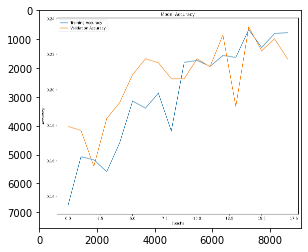

In [100]:
%%time

if not os.path.exists('/content/drive/My Drive/Colab Notebooks/Projet_6/xcept_model_1.jpg'):

  plt.figure(figsize=(12,10))
  plt.subplot()
  plt.title('Model Accuracy')
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.ylabel('Accuracy')
  plt.xlabel('Epochs')
  plt.legend(['Training Accuracy','Validation Accuracy'])
  plt.savefig('/content/drive/My Drive/Colab Notebooks/Projet_6/xcept_model_1.jpg', transparent= False, bbox_inches= 'tight', dpi= 900)
  plt.show()

else :

  plt.imshow(plt.imread('/content/drive/My Drive/Colab Notebooks/Projet_6/xcept_model_1.jpg'))

CPU times: user 2.21 s, sys: 77.1 ms, total: 2.29 s
Wall time: 2.66 s


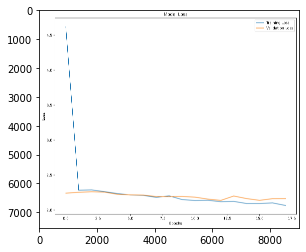

In [101]:
%%time

if not os.path.exists('/content/drive/My Drive/Colab Notebooks/Projet_6/xcept_model_2.jpg'):

  plt.figure(figsize=(12,10))
  plt.title('Model Loss')
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.ylabel('Loss')
  plt.xlabel('Epochs')
  plt.legend(['Training Loss','Validation Loss'])
  plt.savefig('/content/drive/My Drive/Colab Notebooks/Projet_6/xcept_model_2.jpg', transparent= False, bbox_inches= 'tight', dpi= 900)
  plt.show()

else :

  plt.imshow(plt.imread('/content/drive/My Drive/Colab Notebooks/Projet_6/xcept_model_2.jpg'))

###  Inception v3

In [102]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

In [103]:
K.clear_session()
InceptionV3 = tf.keras.applications.inception_v3.InceptionV3(include_top=False,
                  input_shape=(224,224,3),
                  weights = 'imagenet', # Load weights pre-trained on ImageNet.
                  pooling = 'avg'
                  ) 

for layer in InceptionV3.layers :
  layer.trainable = False


base_output = InceptionV3.output
base_output = Dense(128, activation = 'relu')(base_output)
base_output = Dropout(0.5)(base_output)

predictions = Dense(10, activation = 'softmax')(base_output)

InceptionV3_model = tf.keras.models.Model(inputs=InceptionV3.input, outputs = predictions)

87910968/87910968 [==============================] - 1s 0us/step


In [104]:
InceptionV3_model.compile(optimizer='adam',
                    loss='sparse_categorical_crossentropy',
                    metrics=["accuracy"])

In [105]:
InceptionV3_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

In [106]:
%%time

from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

if not os.path.isdir("/content/drive/My Drive/Colab Notebooks/Projet_6/InceptionV3_model"):

  epochs= 20 # 20 Epochs

  checkpointer = ModelCheckpoint(filepath='/content/drive/My Drive/Colab Notebooks/Projet_6/InceptionV3_model', 
                                verbose=2, save_best_only=True)

  early_stopping = EarlyStopping(
        monitor='val_loss', # looking about this score
        patience = 5, # Equivalent epochs didnt move
        verbose=2,
        mode='auto',
        baseline=None,
        restore_best_weights=False,
        )
  
  csvlogger = CSVLogger(
  filename= "/content/drive/My Drive/Colab Notebooks/Projet_6/InceptionV3_model.log",
  separator = ",",
  append = False)

  history = InceptionV3_model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs,
    callbacks=[checkpointer, early_stopping, csvlogger]
    )

else :
  InceptionV3_model = keras.models.load_model('/content/drive/My Drive/Colab Notebooks/Projet_6/InceptionV3_model')
  print('The Model has already been saved')

The Model has already been saved
CPU times: user 19.4 s, sys: 646 ms, total: 20 s
Wall time: 24.8 s


Epoch 6: early stopping
CPU times: user 58.3 s, sys: 1.76 s, total: 1min
Wall time: 2min 5s

#### Vizualisation :

CPU times: user 1.89 s, sys: 69.6 ms, total: 1.96 s
Wall time: 2.32 s


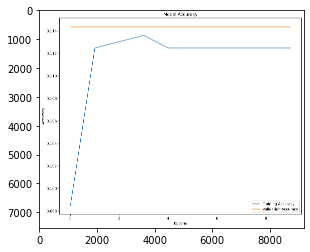

In [107]:
%%time

if not os.path.exists('/content/drive/My Drive/Colab Notebooks/Projet_6/InceptionV3_model_1.jpg'):

  plt.figure(figsize=(12,10))
  plt.subplot()
  plt.title('Model Accuracy')
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.ylabel('Accuracy')
  plt.xlabel('Epochs')
  plt.legend(['Training Accuracy','Validation Accuracy'])
  plt.savefig('/content/drive/My Drive/Colab Notebooks/Projet_6/InceptionV3_model_1.jpg', transparent= False, bbox_inches= 'tight', dpi= 900)
  plt.show()

else :

  plt.imshow(plt.imread('/content/drive/My Drive/Colab Notebooks/Projet_6/InceptionV3_model_1.jpg'))

CPU times: user 1.82 s, sys: 62.5 ms, total: 1.89 s
Wall time: 2.12 s


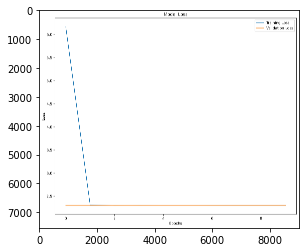

In [108]:
%%time

if not os.path.exists('/content/drive/My Drive/Colab Notebooks/Projet_6/InceptionV3_model_2.jpg'):

  plt.figure(figsize=(12,10))
  plt.title('Model Loss')
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.ylabel('Loss')
  plt.xlabel('Epochs')
  plt.legend(['Training Loss','Validation Loss'])
  plt.savefig('/content/drive/My Drive/Colab Notebooks/Projet_6/InceptionV3_model_2.jpg', transparent= False, bbox_inches= 'tight', dpi= 900)
  plt.show()

else :

  plt.imshow(plt.imread('/content/drive/My Drive/Colab Notebooks/Projet_6/InceptionV3_model_2.jpg'))

# Tranfert Learning with all breeds :

### Validation and Train for all breeds :

In [109]:
image_size = (224,224)
batch_size = 16

In [110]:
%%time
train_ds_full = tf.keras.preprocessing.image_dataset_from_directory(
    image,
    validation_split=0.2,
    subset="training",
    label_mode = 'int',
    seed = 1337, # random state
    image_size= image_size,
    batch_size=batch_size,
)

Found 20580 files belonging to 120 classes.
Using 16464 files for training.
CPU times: user 2.21 s, sys: 1.33 s, total: 3.54 s
Wall time: 6.57 s


In [111]:
%%time
val_ds_full = tf.keras.preprocessing.image_dataset_from_directory(
    image,
    validation_split=0.2,
    subset="validation",
    label_mode = 'int',
    seed = 1337, # random state
    image_size=image_size,
    batch_size=batch_size,
)

Found 20580 files belonging to 120 classes.
Using 4116 files for validation.
CPU times: user 2.2 s, sys: 1.25 s, total: 3.45 s
Wall time: 6.41 s


## EFFICIENT NET :

In [112]:
K.clear_session()
efficient_model_full = keras.applications.EfficientNetB0(include_top=False,
                  input_shape=(224,224,3),
                  weights = 'imagenet', # Load weights pre-trained on ImageNet.
                  pooling = 'avg'
                  ) 

for layer in efficient_model_full.layers :
  layer.trainable = False


flatten = efficient_model_full.output
flatten = Dense(1024, activation = 'relu')(flatten)
flatten = Dropout(0.5)(flatten)
predictions = Dense(120, activation = 'softmax')(flatten)
efficient_model_full = tf.keras.models.Model(inputs=efficient_model_full.input, outputs = predictions)

In [113]:
efficient_model_full.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 224, 224, 3)  0           ['input_1[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, 224, 224, 3)  7           ['rescaling[0][0]']              
                                                                                                  
 tf.math.truediv (TFOpLambda)   (None, 224, 224, 3)  0           ['normalization[0][0]']      

In [114]:
%%time
efficient_model_full.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

CPU times: user 22.1 ms, sys: 0 ns, total: 22.1 ms
Wall time: 24.2 ms


In [115]:
%%time

if not os.path.isdir("/content/drive/My Drive/Colab Notebooks/Projet_6/efficient_net_model_full"):

  epochs= 5 # 20 Epochs

  checkpointer = ModelCheckpoint(filepath='/content/drive/My Drive/Colab Notebooks/Projet_6/efficient_net_model_full', 
                                verbose=2, save_best_only=True)

  early_stopping = EarlyStopping(
        monitor='val_loss', # looking about this score
        patience = 5, # Equivalent epochs didnt move
        verbose = 2,
        mode='auto',
        baseline=None,
        restore_best_weights=False,
        )
  
  csvlogger = CSVLogger(
  filename= "/content/drive/My Drive/Colab Notebooks/Projet_6/efficient_net_model_full.log",
  separator = ",",
  append = False)

  history = efficient_model_full.fit(
    train_ds_full,
    validation_data=val_ds_full,
    epochs=epochs,
    callbacks=[checkpointer, early_stopping, csvlogger]
    )

  efficient_model_full.save('/content/drive/My Drive/Colab Notebooks/Projet_6/efficient_net_model_full')

else :
  efficient_model_full = keras.models.load_model('/content/drive/My Drive/Colab Notebooks/Projet_6/efficient_net_model_full')
  print('The Model has already been saved')

Epoch 1/5
1029/1029 [==============================] - ETA: 0s - loss: 1.0835 - accuracy: 0.6967
Epoch 1: val_loss improved from inf to 0.61842, saving model to /content/drive/My Drive/Colab Notebooks/Projet_6/efficient_net_model_full


1029/1029 [==============================] - 2652s 3s/step - loss: 1.0835 - accuracy: 0.6967 - val_loss: 0.6184 - val_accuracy: 0.8044
Epoch 2/5
1029/1029 [==============================] - ETA: 0s - loss: 0.6561 - accuracy: 0.8016
Epoch 2: val_loss improved from 0.61842 to 0.59665, saving model to /content/drive/My Drive/Colab Notebooks/Projet_6/efficient_net_model_full


1029/1029 [==============================] - 1491s 1s/step - loss: 0.6561 - accuracy: 0.8016 - val_loss: 0.5966 - val_accuracy: 0.8190
Epoch 3/5
1029/1029 [==============================] - ETA: 0s - loss: 0.5474 - accuracy: 0.8315
Epoch 3: val_loss did not improve from 0.59665
1029/1029 [==============================] - 1631s 2s/step - loss: 0.5474 - accuracy: 0.8315 - val_loss: 0.6198 - val_accuracy: 0.8251
Epoch 4/5
1029/1029 [==============================] - ETA: 0s - loss: 0.4905 - accuracy: 0.8508
Epoch 4: val_loss did not improve from 0.59665
1029/1029 [==============================] - 1605s 2s/step - loss: 0.4905 - accuracy: 0.8508 - val_loss: 0.6200 - val_accuracy: 0.8248
Epoch 5/5
1029/1029 [==============================] - ETA: 0s - loss: 0.4476 - accuracy: 0.8632
Epoch 5: val_loss did not improve from 0.59665
1029/1029 [==============================] - 1584s 2s/step - loss: 0.4476 - accuracy: 0.8632 - val_loss: 0.6347 - val_accuracy: 0.8321


CPU times: user 3h 23min 40s, sys: 16min 37s, total: 3h 40min 18s
Wall time: 2h 32min 36s


loss: 0.4476 

accuracy: 0.8632 

val_loss: 0.6347 

val_accuracy: 0.8321

CPU times: user 3h 23min 40s, sys: 16min 37s, total: 3h 40min 18s
Wall time: 2h 32min 36s

#### Vizualisation :


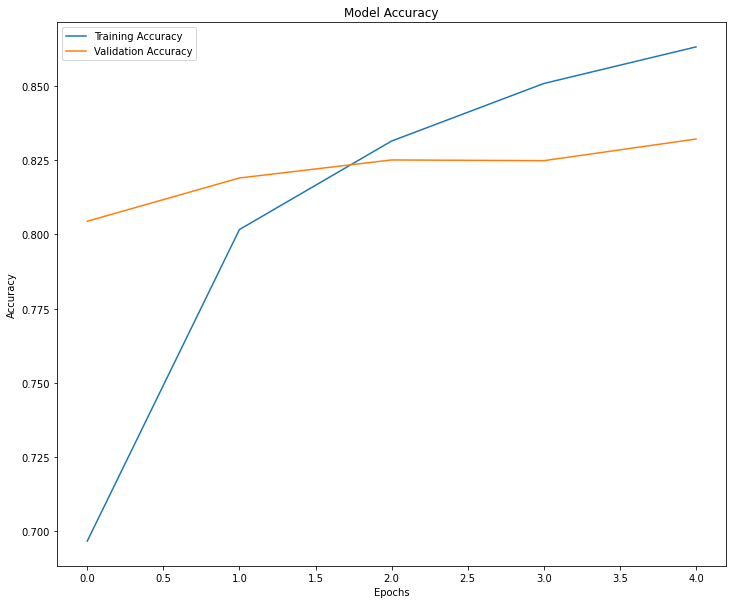

CPU times: user 3.18 s, sys: 276 ms, total: 3.45 s
Wall time: 3.52 s


In [127]:
%%time

if not os.path.exists('/content/drive/My Drive/Colab Notebooks/Projet_6/efficient_net_model_full_1.jpg'):

  plt.figure(figsize=(12,10))
  plt.title('Model Accuracy')
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.ylabel('Accuracy')
  plt.xlabel('Epochs')
  plt.legend(['Training Accuracy','Validation Accuracy'])
  plt.savefig('/content/drive/My Drive/Colab Notebooks/Projet_6/efficient_net_model_full_1.jpg', transparent= False, bbox_inches= 'tight', dpi= 900)
  plt.show()

else :

  plt.imshow(plt.imread('/content/drive/My Drive/Colab Notebooks/Projet_6/efficient_net_model_full_1.jpg'))

CPU times: user 1.97 s, sys: 100 ms, total: 2.07 s
Wall time: 2.1 s


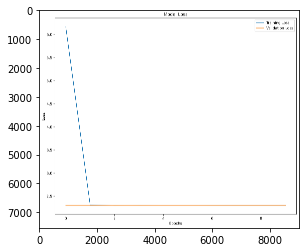

In [128]:
%%time

if not os.path.exists('/content/drive/My Drive/Colab Notebooks/Projet_6/efficient_net_model_full_2.jpg'):

  plt.figure(figsize=(12,10))
  plt.title('Model Loss')
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.ylabel('Loss')
  plt.xlabel('Epochs')
  plt.legend(['Training Loss','Validation Loss'])
  plt.savefig('/content/drive/My Drive/Colab Notebooks/Projet_6/efficient_net_model_full_2.jpg', transparent= False, bbox_inches= 'tight', dpi= 900)
  plt.show()

else :

  plt.imshow(plt.imread('/content/drive/My Drive/Colab Notebooks/Projet_6/efficient_net_model_full_2.jpg'))

# Prediction :

source : https://www.kaggle.com/code/deepakat002/inception-xception-nasnetlarge-inceptionres/notebook

### Load the image :

In [159]:
breed_prediction = os.listdir(image)

In [160]:
import cv2
import numpy as np

In [161]:
print(f"The number of breeds we have for the prediction is :", len(breed_names))

The number of breeds we have for the prediction is : 10


In [162]:
breed_names

['Maltese_dog',
 'Afghan_hound',
 'Scottish_deerhound',
 'Pomeranian',
 'Samoyed',
 'Bernese_mountain_dog',
 'Irish_wolfhound',
 'Tzu',
 'Great_Pyrenees',
 'Leonberg']

In [163]:
rand_idx = np.random.choice(range(len(breed_names)))

pred_img = cv2.imread(image_top_10 + breed_names[rand_idx] + '/' + 
                      np.random.choice(os.listdir(image_top_10 + breed_names[rand_idx])))

In [164]:
rand_idx = np.random.choice(range(len(breed_names)))

pred_img = cv2.imread(image_top_10 + breed_names[rand_idx] + '/' + 
                      np.random.choice(os.listdir(image_top_10 + breed_names[rand_idx])))

Text(0.5, 1.0, 'Maltese_dog')

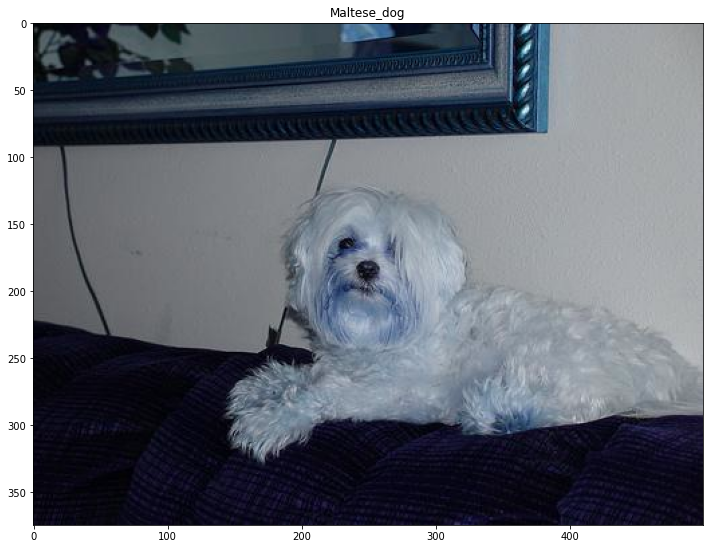

In [165]:
plt.figure(figsize=(12,10))
plt.imshow(pred_img)
plt.title('{}'.format(breed_names[rand_idx]))

In [166]:
efficient_model = keras.models.load_model('/content/drive/My Drive/Colab Notebooks/Projet_6/efficient_net_model')

img = pred_img
img = cv2.resize(img,(224, 224))
img = np.expand_dims(img,axis =0)

preds = efficient_model.predict(img) # using model for the prediction

pred_label =  breed_names[np.argmax(preds)] # label of preidction

print(f" The prediction for the breed is :", pred_label) # name of the breeds
print(f"The probability of right predicition is :", round(max(preds[0])*100,4),"%" ) # percent

1/1 [==============================] - 2s 2s/step
 The prediction for the breed is : Maltese_dog
The probability of right predicition is : 99.7463 %
